In [157]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl



In [225]:
# New Antecedent/Consequent objects hold universe variables and membership
# functions
age = ctrl.Antecedent(np.arange(20, 65, 1), 'age')
salaire = ctrl.Antecedent(np.arange(2000, 30000,1), 'salaire')
Montant = ctrl.Consequent(np.arange(0, 100000,1), 'Montant')

# Auto-membership function population is possible with .automf(3, 5, or 7)
namesage=["petit","moyen","grande"]
age.automf(names=namesage)
salaire.automf(names=namesage)
Montant.automf(names=["tpetit","petit","moyen","grande","tgrande"])

Montant['tpetit'] = fuzz.trimf(Montant.universe, [0, 0, 20002])
Montant['petit'] = fuzz.trimf(Montant.universe, [19998, 30000, 40002])
Montant['moyen'] = fuzz.trimf(Montant.universe, [39998, 50000, 60002])
Montant['grande'] = fuzz.trimf(Montant.universe, [59998, 70000,80002])
Montant['tgrande'] = fuzz.trimf(Montant.universe, [79998,100000,100000])



C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


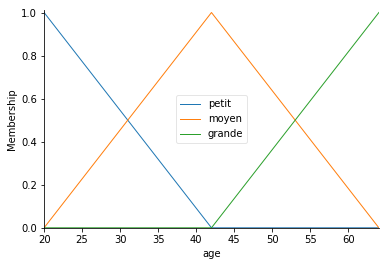

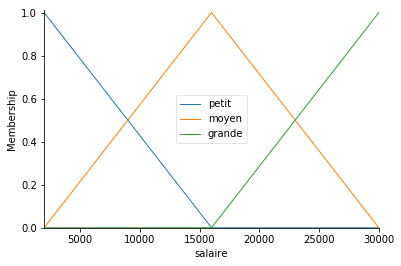

In [226]:
age.view()
salaire.view()


In [227]:
rule1 = ctrl.Rule(age['petit'] & salaire['petit'], Montant['petit'])
rule2 = ctrl.Rule(age['petit'] & salaire['moyen'], Montant['moyen'])
rule3 = ctrl.Rule(age['petit'] & salaire['grande'], Montant['tgrande'])
rule4 = ctrl.Rule(age['moyen'] & salaire['petit'], Montant['tpetit'])
rule5 = ctrl.Rule(age['moyen'] & salaire['moyen'], Montant['moyen'])
rule6 = ctrl.Rule(age['moyen'] & salaire['grande'], Montant['grande'])
rule7 = ctrl.Rule(age['grande'] & salaire['petit'], Montant['tpetit'])
rule8 = ctrl.Rule(age['grande'] & salaire['moyen'], Montant['petit'])
rule9 = ctrl.Rule(age['grande'] & salaire['grande'], Montant['moyen'])


In [228]:
cf = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])

In [229]:
tipping = ctrl.ControlSystemSimulation(cf)

In [230]:
tipping.input['age'] = 30
tipping.input['salaire'] = 25000

# Crunch the numbers
tipping.compute()

72892.76855836852


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


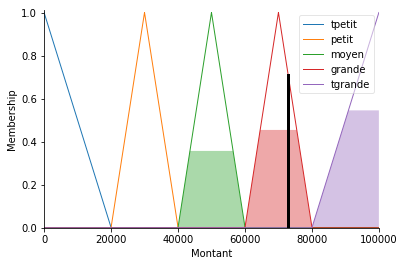

In [231]:
print (tipping.output['Montant'])
Montant.view(sim=tipping)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


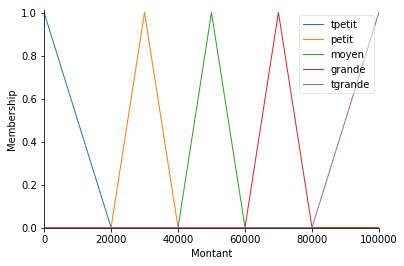

In [232]:
Montant.view()

In [233]:
###################exercice2#############################333333

In [301]:
distance = ctrl.Antecedent(np.arange(0, 100,1), 'distance')
distance.automf(names=["tres courte","courte","moyen","long","tres long"])
vitess = ctrl.Antecedent(np.arange(0, 200,4), 'vitess')
vitess.automf(names=["tres petit","petit","moyen","grand","tres grand"])
frenage = ctrl.Consequent(np.arange(0, 100,1), 'frenage')
frenage.automf(names=["tres tres doucement","tres doucement","doucement","normal","fortement","tres fortement","tres tres fortement"])


distance['tres courte'] = fuzz.trapmf(distance.universe, [0, 0,15, 25])
distance['courte'] = fuzz.trapmf(distance.universe, [15, 25,35, 45])
distance['moyen'] = fuzz.trapmf(distance.universe, [35, 45,55, 65])
distance['long'] = fuzz.trapmf(distance.universe, [55, 65,75, 85])
distance['tres long'] = fuzz.trapmf(distance.universe, [75, 85,95, 100])

vitess['tres petit'] = fuzz.trapmf(vitess.universe, [0, 0,38,42])
vitess['petit'] = fuzz.trapmf(vitess.universe, [38, 42,78, 82])
vitess['moyen'] = fuzz.trapmf(vitess.universe, [78, 82,118, 122])
vitess['grand'] = fuzz.trapmf(vitess.universe, [118, 122,158, 162])
vitess['tres grand'] = fuzz.trapmf(vitess.universe, [158, 162,198,200])

frenage['tres tres doucement'] = fuzz.trimf(frenage.universe, [0, 0, 10])
frenage['tres doucement'] = fuzz.trimf(frenage.universe, [10, 15, 20])
frenage['doucement'] = fuzz.trimf(frenage.universe, [15, 25, 30])
frenage['normal'] = fuzz.trimf(frenage.universe, [25, 30,50])
frenage['fortement'] = fuzz.trimf(frenage.universe, [30,50,70])
frenage['tres fortement'] = fuzz.trimf(frenage.universe, [50, 70, 90])
frenage['tres tres fortement'] = fuzz.trimf(frenage.universe, [70, 90, 100])

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


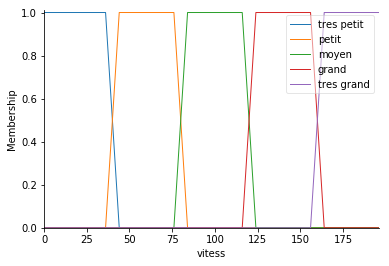

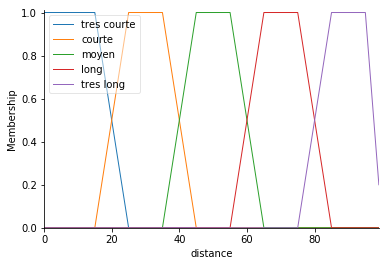

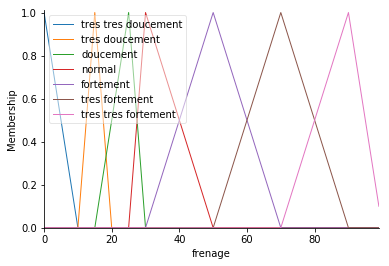

In [302]:
vitess.view()
distance.view()
frenage.view()

In [304]:
rule1 = ctrl.Rule(vitess['tres petit'] & distance['tres courte'], frenage['fortement'])
rule2 = ctrl.Rule(vitess['tres petit'] & distance['courte'], frenage['normal'])
rule3 = ctrl.Rule(vitess['tres petit'] & distance['moyen'], frenage['doucement'])
rule4 = ctrl.Rule(vitess['tres petit'] & distance['long'], frenage['tres doucement'])
rule5 = ctrl.Rule(vitess['tres petit'] & distance['tres long'], frenage['tres tres doucement'])


rule6 = ctrl.Rule(vitess['petit'] & distance['tres courte'], frenage['doucement'])
rule7 = ctrl.Rule(vitess['petit'] & distance['courte'], frenage['normal'])
rule8 = ctrl.Rule(vitess['petit'] & distance['moyen'], frenage['fortement'])
rule9 = ctrl.Rule(vitess['petit'] & distance['long'], frenage['tres fortement'])
rule10 = ctrl.Rule(vitess['petit'] & distance['tres long'], frenage['tres tres fortement'])


rule11 = ctrl.Rule(vitess['moyen'] & distance['tres courte'], frenage['tres tres doucement'])
rule12 = ctrl.Rule(vitess['moyen'] & distance['courte'], frenage['tres doucement'])
rule13 = ctrl.Rule(vitess['moyen'] & distance['moyen'], frenage['tres fortement'])
rule14 = ctrl.Rule(vitess['moyen'] & distance['long'], frenage['doucement'])
rule15 = ctrl.Rule(vitess['moyen'] & distance['tres long'], frenage['fortement'])


rule16 = ctrl.Rule(vitess['grand'] & distance['tres courte'], frenage['normal'])
rule17 = ctrl.Rule(vitess['grand'] & distance['courte'], frenage['fortement'])
rule18 = ctrl.Rule(vitess['grand'] & distance['moyen'], frenage['fortement'])
rule19 = ctrl.Rule(vitess['grand'] & distance['long'], frenage['fortement'])
rule20 = ctrl.Rule(vitess['grand'] & distance['tres long'], frenage['normal'])
                   
rule21= ctrl.Rule(vitess['tres grand'] & distance['tres courte'], frenage['tres tres doucement'])
rule22= ctrl.Rule(vitess['tres grand'] & distance['courte'], frenage['tres doucement'])
rule23= ctrl.Rule(vitess['tres grand'] & distance['moyen'], frenage['tres fortement'])
rule24= ctrl.Rule(vitess['tres grand'] & distance['long'], frenage['normal'])
rule25= ctrl.Rule(vitess['tres grand'] & distance['tres long'], frenage['normal'])

In [305]:
cf2 = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, 
                         rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19,
                         rule20, rule21, rule22, rule23, rule24, rule25])

In [306]:
tipping2 = ctrl.ControlSystemSimulation(cf2)

In [307]:
tipping2.input['vitess'] = 30
tipping2.input['distance'] = 50

# Crunch the numbers
tipping2.compute()

23.333333333333325
<built-in method title of str object at 0x000001D10BE11EA0>


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


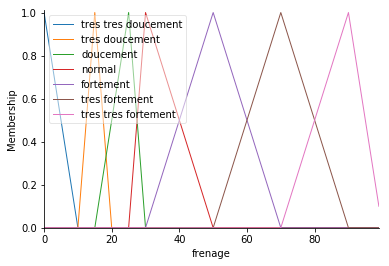

In [330]:
print (tipping2.output['frenage'])
print (tipping2)

frenage.view(sim=tipping2)